# Word Embeddings

## Word2Vec

Word2Vec is a popular technique in natural language processing (NLP) for learning vector representations of words, also known as word embeddings. These embeddings capture semantic relationships between words, such that words used in similar contexts are placed close to each other in the vector space.

There are two main architectures for Word2Vec:

- **Continuous Bag-of-Words (CBOW):** Predicts the current word based on its context (surrounding words).
- **Skip-Gram:** Predicts surrounding words given the current word.

In this tutorial, you will implement a simplified version of the Skip-Gram model using Python and train it on a given dataset.

---

## Your Task:

#### **Data Preparation:**

- Given a corpus of text (dataset.en), preprocess the data to create training examples suitable for a Skip-Gram model.
- Implement functions to tokenize the text, build a vocabulary, and generate input-output pairs for training.

#### **Implement a Simple Skip-Gram Model:**

- implement a simple neural network representing the Skip-Gram architecture.
- The model should learn word embeddings by training on the generated input-output pairs.

#### **Train the Model:**

- Train your Skip-Gram model on the prepared data.
- Use appropriate loss functions and optimization algorithms.

#### **Visualize Word Embeddings:**

- After training, visualize the learned word embeddings in 2D space using techniques like PCA or t-SNE.
- Plot the words to observe how similar words are positioned relative to each other.


#### **Notes:**
- The provided helper function templates are meant to give you an overview of the task. However, feel free to design and implement your own structure as you see fit.

- If the training process is slow, consider reducing the size of the dataset to improve training speed.


### Allowed Libraries:
- **collections** for building vocabulary.
- **NumPy:** For numerical computations.
- **Matplotlib:** For plotting and visualization.
- **scikit-learn (sklearn):** For dimensionality reduction techniques like PCA or t-SNE, evaluation metrics.
- **TensorFlow or PyTorch** if you prefer to implement the model using these frameworks. However, since the challenge aims to be simple and educational, using NumPy suffices.



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Vocabulary size: 1000
Number of training pairs: 127268
Epoch 1/5, Average Loss: 3.8667
Epoch 2/5, Average Loss: 2.9404
Epoch 3/5, Average Loss: 2.8728
Epoch 4/5, Average Loss: 2.8389
Epoch 5/5, Average Loss: 2.8154


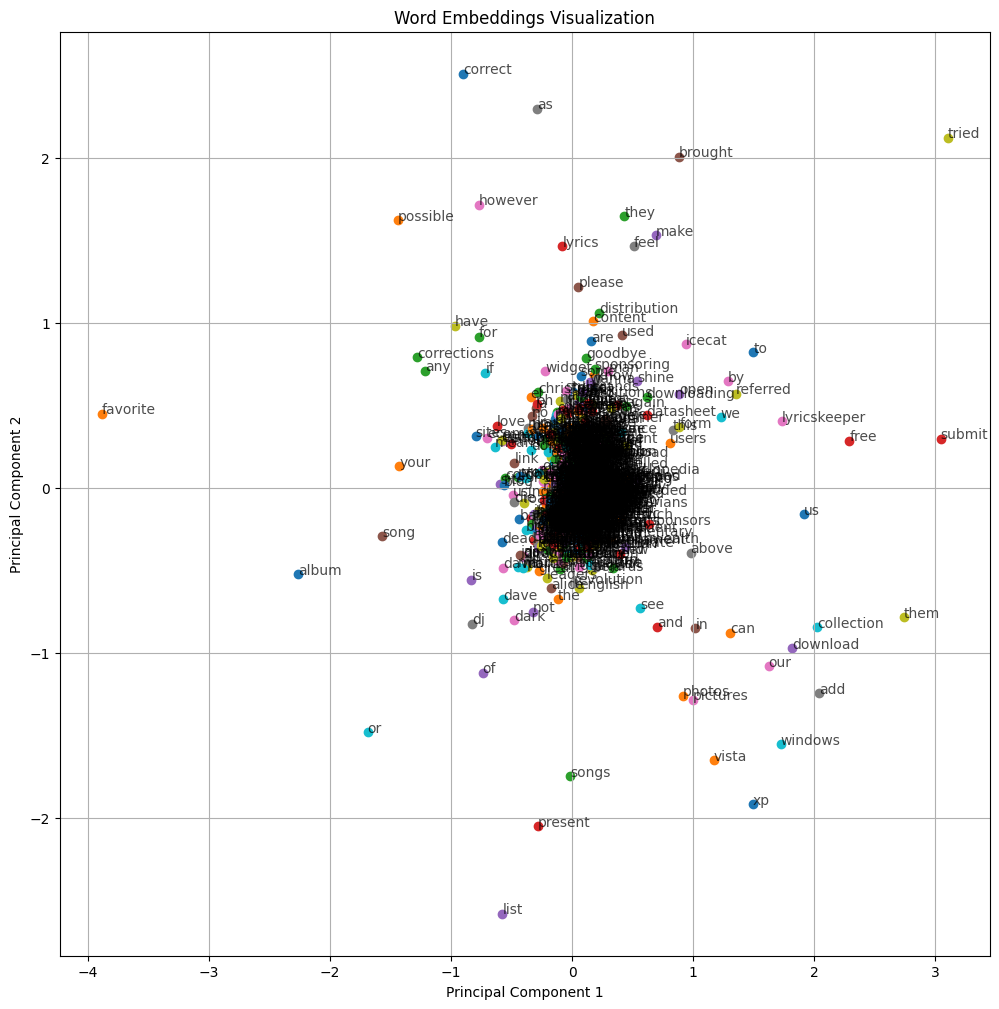

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import re
from collections import defaultdict

# Step 1: Data Preparation

# Read data from 'dataset.en'
from google.colab import drive
drive.mount('/content/drive')
with open('/content/drive/MyDrive/Assignment_3_NLP/assignment_3_word2vec/dataset.en', 'r', encoding='utf-8') as f:
    corpus = f.readlines()



# Preprocess the corpus
def preprocess_corpus(corpus, window_size=2, min_count=2, max_vocab_size=1000):
    """
    Implement this function to:
    - Tokenize the corpus (remove punctuation, convert to lowercase)
    - Build a vocabulary and mappings (word2idx, idx2word)
    - Generate training pairs for the Skip-Gram model
    - Return vocabulary, word2idx, idx2word, and training_pairs
    """
    # TODO: Implement preprocessing steps
    # Hints:
    # - Use re.sub to remove punctuation
    # - Use sentence.lower() to convert to lowercase
    # - Use sentence.split() to tokenize
    # - Use a dictionary to count word frequencies
    # - Build word2idx and idx2word mappings
    # - Generate training pairs using a sliding window

    # Tokenization and Cleaning
    tokenized_corpus = []
    word_counts = defaultdict(int)

    for sentence in corpus:
        sentence = re.sub(r'[^\w\s]', '', sentence.lower())
        words = sentence.split()

        tokens = sentence.split()
        tokenized_corpus.append(tokens)
        for token in tokens:
            word_counts[token] += 1

    vocab = [word for word, count in word_counts.items() if count >= min_count]
    vocab = sorted(vocab, key=lambda x: word_counts[x], reverse=True)[:max_vocab_size]

    word2idx = {word: idx for idx, word in enumerate(vocab)}
    idx2word = {idx: word for word, idx in word2idx.items()}

    training_pairs = []
    for tokens in tokenized_corpus:
        for i, centre_word in enumerate(tokens):
          if centre_word in word2idx:
            centre_idx = word2idx[centre_word]
            start = max(0, i - window_size)
            end = min(len(tokens), i + window_size + 1)
            for j in range(start, end):
              if j != i and tokens[j] in word2idx:
                context_idx = word2idx[tokens[j]]
                training_pairs.append((centre_idx, context_idx))
    return vocab, word2idx, idx2word, training_pairs

# Call the preprocessing function
vocabulary, word2idx, idx2word, training_pairs = preprocess_corpus(
    corpus, window_size=2, min_count=2, max_vocab_size=1000
)

# Print vocabulary size and number of training pairs
# (Uncomment after implementing preprocess_corpus)
# print(f"Vocabulary size: {len(vocabulary)}")
# print(f"Number of training pairs: {len(training_pairs)}")

print(f"Vocabulary size: {len(vocabulary)}")
print(f"Number of training pairs: {len(training_pairs)}")

# Step 2: Implement the Skip-Gram Model
class SkipGramModel:
    def __init__(self, vocab_size, embedding_dim):
        """
        Initialize model parameters:
        - embeddings: Embedding matrix of shape (vocab_size, embedding_dim)
        - output_weights: Output weight matrix of shape (embedding_dim, vocab_size)
        - output_biases: Output biases vector of shape (vocab_size,)
        """
        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim
        # TODO: Initialize self.embeddings with random values
        # TODO: Initialize self.output_weights with random values
        # TODO: Initialize self.output_biases with zeros
        self.embeddings = np.random.rand(vocab_size, embedding_dim) * 0.01
        self.output_weights = np.random.rand(embedding_dim, vocab_size) * 0.01
        self.output_biases = np.zeros(vocab_size)

    def softmax(self, x):
        """
        Implement the softmax function.
        Input:
        - x: Numpy array of shape (vocab_size,)
        Returns:
        - Softmax probabilities of shape (vocab_size,)
        """
        # TODO: Compute softmax of input x
        x_stable = x - np.max(x)
        exp_x = np.exp(x_stable)
        softmax_probs = exp_x / np.sum(exp_x)
        return softmax_probs

    def forward(self, input_word_idx):
        """
        Forward pass of the Skip-Gram model.
        Input:
        - input_word_idx: Integer index of the input word
        Returns:
        - y_pred: Predicted probabilities (softmax output), shape (vocab_size,)
        - h: Hidden layer activations (embedding of input word), shape (embedding_dim,)
        """
        # TODO: Implement forward pass
        h = self.embeddings[input_word_idx]
        scores = np.dot(h, self.output_weights) + self.output_biases
        y_pred = self.softmax(scores)
        return y_pred, h

    def backward(self, h, y_pred, input_word_idx, target_word_idx, learning_rate):
        """
        Backward pass and parameter updates.
        Inputs:
        - h: Hidden layer activations from forward pass, shape (embedding_dim,)
        - y_pred: Predicted probabilities from forward pass, shape (vocab_size,)
        - input_word_idx: Integer index of the input word
        - target_word_idx: Integer index of the target context word
        - learning_rate: Learning rate for parameter updates
        """
        # TODO: Implement backward pass
        # Steps:
        # - Create one-hot vector for target word
        # - Compute error between y_pred and true distribution
        # - Compute gradients for embeddings and output weights
        # - Update model parameters
        target = np.zeros(self.vocab_size)
        target[target_word_idx] = 1
        error = y_pred - target
        grad_output_weights = np.outer(h, error)
        grad_output_biases = error
        grad_embeddings = np.dot(self.output_weights, error)
        self.output_weights -= learning_rate * grad_output_weights
        self.output_biases -= learning_rate * grad_output_biases
        self.embeddings[input_word_idx] -= learning_rate * grad_embeddings

    def train(self, training_pairs, epochs, learning_rate):
        """
        Training loop for the Skip-Gram model.
        Inputs:
        - training_pairs: List of tuples (input_word_idx, target_word_idx)
        - epochs: Number of training epochs
        - learning_rate: Learning rate for parameter updates
        """
        # TODO: Implement training loop
        # Steps:
        # - Iterate over epochs
        # - Shuffle training pairs each epoch
        # - For each training pair:
        #     - Perform forward pass
        #     - Compute loss (cross-entropy)
        #     - Perform backward pass and update parameters
        # - Print average loss per epoch to monitor training
        for epoch in range(epochs):
            np.random.shuffle(training_pairs)
            total_loss = 0
            for input_word_idx, target_word_idx in training_pairs:
                y_pred, h = self.forward(input_word_idx)
                target = np.zeros(self.vocab_size)
                target[target_word_idx] = 1
                loss = -np.log(y_pred[target_word_idx] + 1e-9)
                total_loss += loss
                self.backward(h, y_pred, input_word_idx, target_word_idx, learning_rate)

            avg_loss = total_loss / len(training_pairs)
            print(f"Epoch {epoch + 1}/{epochs}, Average Loss: {avg_loss:.4f}")

    def get_embeddings(self):
        """
        Return the learned embeddings.
        Returns:
        - embeddings: Numpy array of shape (vocab_size, embedding_dim)
        """
        # TODO: Return self.embeddings
        return self.embeddings


# Step 3: Train the Model
embedding_dim = 10 # You can change the dimension size as required
model = SkipGramModel(vocab_size=len(vocabulary), embedding_dim=embedding_dim)


# Train the model
# (Uncomment after implementing the model)
model.train(training_pairs, epochs=5, learning_rate=0.01)


# Step 4: Visualize Word Embeddings
# Get the embeddings
# (Uncomment after implementing get_embeddings)
embeddings = model.get_embeddings()

# Reduce dimensions to 2D
# (Uncomment after embeddings are available)
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Plot the embeddings
# (Uncomment after embeddings are available)
plt.figure(figsize=(12, 12))
for i, label in enumerate(vocabulary):
    x, y = reduced_embeddings[i]
    plt.scatter(x, y)
    plt.annotate(label, (x, y), alpha=0.7)
plt.title('Word Embeddings Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()